In [8]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import IPython.display as ipd
from IPython.display import Audio
import tensorflow
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [15]:
ravdess =  "./speech-emotion-recognition-ravdess-data/"
ravdess_dir_list = os.listdir(ravdess)
print(ravdess_dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [16]:
crema = "./AudioWAV/"
tess = "./TESS Toronto emotional speech set data/"
savee = "./ALL/"

In [27]:
file_emotion = []
file_path = []

for i in ravdess_dir_list:
    actor = os.listdir(ravdess + i)
    for file in actor:
        part = file.split('.')[0].split('-')
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + i + '/' + file)

In [28]:
emotion_df = pd.DataFrame(file_emotion, columns=['Emotion'])

path_df = pd.DataFrame(file_path,columns=['Path'])
ravdess_df = pd.concat([emotion_df,path_df], axis= 1)

ravdess_df.replace({
    1:'neutral', 
    2:'neutral', 
    3:'happy', 
    4:'sad', 
    5:'angry', 
    6:'fear', 
    7:'disgust',
    8:'surprise'
}, inplace= True)

print(ravdess_df.tail())
print("-------------------------------")
print(ravdess_df.Emotion.value_counts())

       Emotion                                               Path
1435  surprise  ./speech-emotion-recognition-ravdess-data/Acto...
1436  surprise  ./speech-emotion-recognition-ravdess-data/Acto...
1437  surprise  ./speech-emotion-recognition-ravdess-data/Acto...
1438  surprise  ./speech-emotion-recognition-ravdess-data/Acto...
1439  surprise  ./speech-emotion-recognition-ravdess-data/Acto...
-------------------------------
Emotion
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: count, dtype: int64


In [29]:
crema_dir_list  = os.listdir(crema)

file_emotion = []
file_path = []

for file in crema_dir_list:
    file_path.append(crema + file)
    part = file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

emotion_df = pd.DataFrame(file_emotion,columns=['Emotion'])
path_df = pd.DataFrame(file_path,columns=['Path'])

crema_df = pd.concat([emotion_df,path_df],axis=1)
crema_df.head()

,Emotion,Path
0,angry,./AudioWAV/1001_DFA_ANG_XX.wav
1,disgust,./AudioWAV/1001_DFA_DIS_XX.wav
2,fear,./AudioWAV/1001_DFA_FEA_XX.wav
3,happy,./AudioWAV/1001_DFA_HAP_XX.wav
4,neutral,./AudioWAV/1001_DFA_NEU_XX.wav


In [59]:
tess_dir_list = os.listdir(tess)

file_emotion = []
file_path = []

for dir in tess_dir_list:
    dirs = os.listdir(tess+dir)
    for file in dirs:
        part = file.split('.')[0]
        part = part.split('_')
        if(len(part) < 3):
            continue
        part = part[2]
        if part=='ps' or part == "surprised":
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(tess + dir + '/' + file)

emotion_df = pd.DataFrame(file_emotion,columns=['Emotion'])
path_df = pd.DataFrame(file_path,columns=['Path'])

tess_df = pd.concat([emotion_df,path_df],axis=1)
tess_df.Emotion.value_counts()

Emotion
surprise    402
angry       400
disgust     400
fear        400
happy       400
neutral     400
sad         400
Name: count, dtype: int64

In [60]:
savee_directory_list = os.listdir(savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotion'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.Emotion.value_counts())

Emotion
neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: count, dtype: int64


In [68]:
data_path = pd.concat([ravdess_df,crema_df,tess_df,Savee_df],axis=0)
data_path.to_csv("data_path.csv", index=False)
data_path.head()
data_path.Emotion.value_counts()

Emotion
happy       1923
sad         1923
angry       1923
fear        1923
disgust     1923
neutral     1895
surprise     654
Name: count, dtype: int64

In [82]:
# data_path = "data_path.csv"

emotion_df = data_path

emotion_df = emotion_df[emotion_df['Emotion'] != "surprise"]

class_count = emotion_df["Emotion"].value_counts()

rows_to_keep = []
for emotion, count in class_count.items():
    if emotion in ['happy', 'neutral']:
        rows_to_keep.extend(emotion_df[emotion_df['Emotion'] == emotion].index)
    else:
        rows_to_keep.extend(emotion_df[emotion_df['Emotion'] == emotion].sample(n=count - 900, random_state=42).index)

emotion_df = emotion_df.loc[rows_to_keep]

print(emotion_df['Emotion'].value_counts())

emotion_df.to_csv("balanced_data.csv", index=False)

Emotion
neutral    3407
happy      3210
angry      2493
disgust    2398
fear       2361
sad        2300
Name: count, dtype: int64


In [83]:
emotion_df.head()

,Emotion,Path
12,happy,./speech-emotion-recognition-ravdess-data/Acto...
12,fear,./AudioWAV/1001_IEO_FEA_HI.wav
12,angry,./TESS Toronto emotional speech set data/OAF_a...
12,angry,./ALL/DC_a13.wav
13,happy,./speech-emotion-recognition-ravdess-data/Acto...


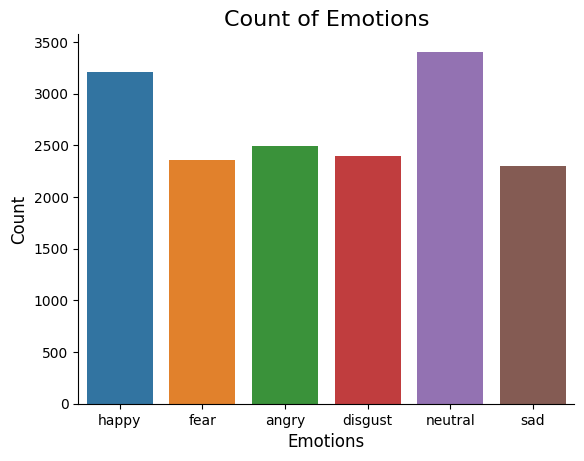

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(x= "Emotion" , data= emotion_df)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [85]:
data,sr = librosa.load(file_path[0])
sr

22050

In [86]:
ipd.Audio(data,rate=sr)

In [109]:
#Data Augmentation

# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data,rate= rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr= sampling_rate, scale= pitch_factor,n_steps=1)

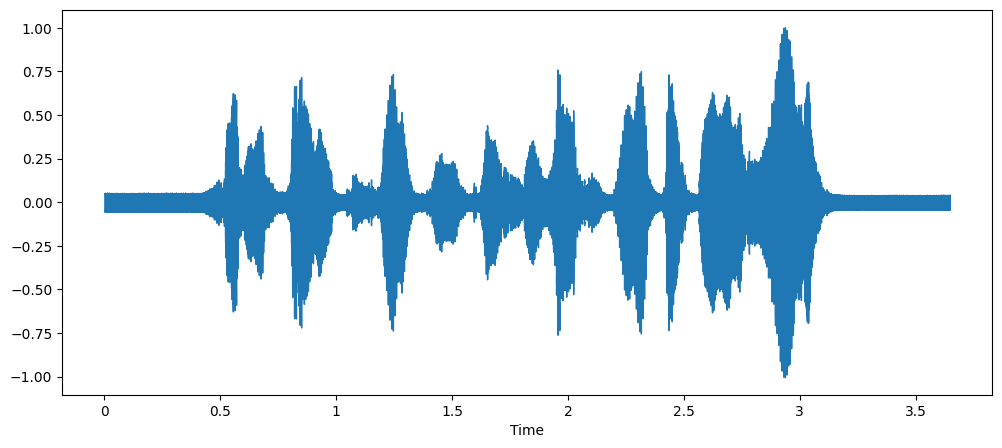

In [110]:

import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

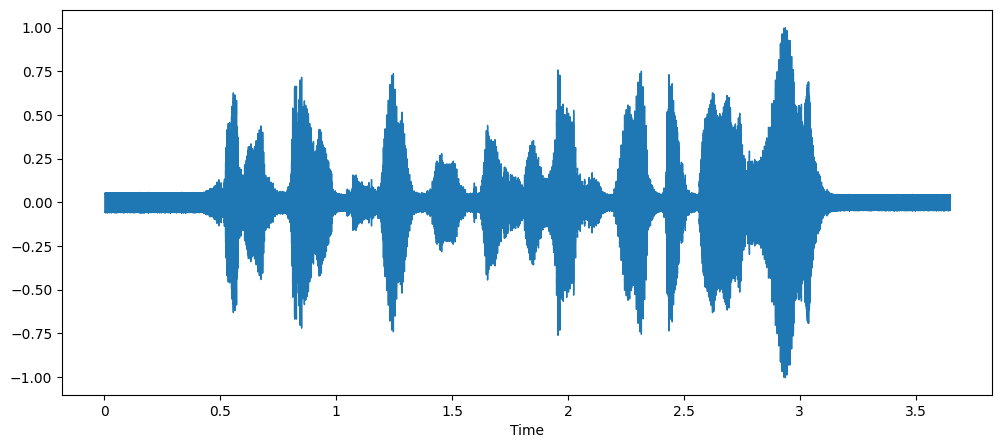

In [111]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

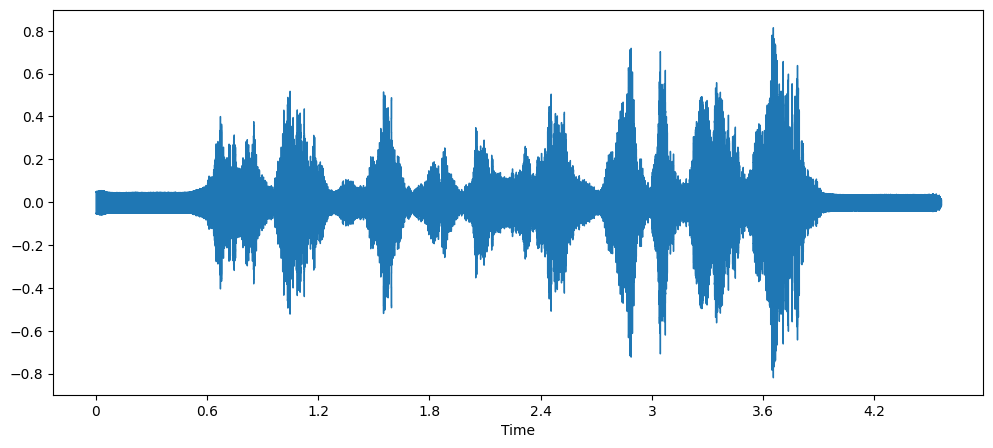

In [112]:
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

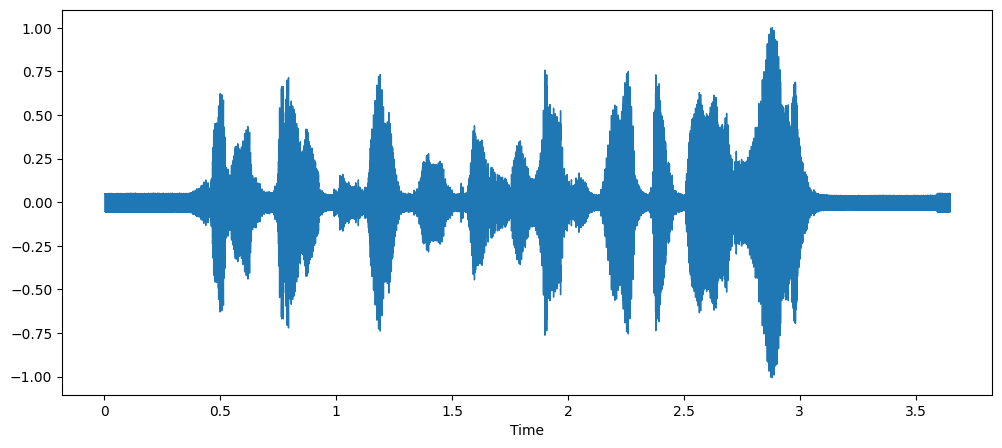

In [113]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

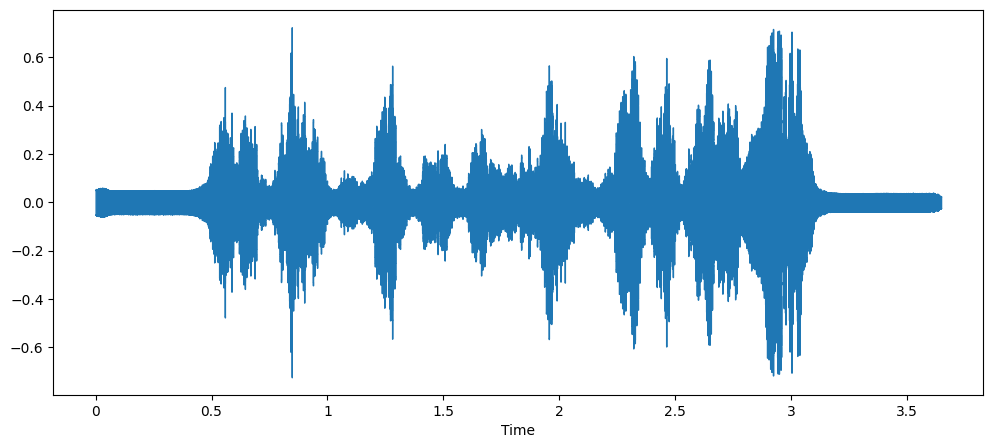

In [114]:
# AUDIO WITH PITCH
x = pitch(data, sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [122]:
#Feature extraction

def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)

def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)
    
    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))
    
    return audio

In [123]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  16


In [124]:
import timeit
from tqdm import tqdm
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(emotion_df.Path,emotion_df.Emotion,range(emotion_df.Path.shape[0]))):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)

1it [00:00,  8.03it/s]

0 audio has been processed


502it [00:33, 13.05it/s]

500 audio has been processed


1003it [01:06, 14.92it/s]

1000 audio has been processed


1503it [01:38, 20.43it/s]

1500 audio has been processed


2002it [02:07, 17.40it/s]

2000 audio has been processed


2503it [02:38, 16.45it/s]

2500 audio has been processed


3002it [03:12, 14.84it/s]

3000 audio has been processed


3504it [03:43, 16.05it/s]

3500 audio has been processed


4004it [04:17, 14.29it/s]

4000 audio has been processed


4502it [04:52, 13.21it/s]

4500 audio has been processed


5003it [05:28, 13.62it/s]

5000 audio has been processed


5503it [06:05, 12.41it/s]

5500 audio has been processed


6002it [06:43, 12.93it/s]

6000 audio has been processed


6504it [07:20, 15.02it/s]

6500 audio has been processed


7003it [07:57, 13.12it/s]

7000 audio has been processed


7502it [08:34, 13.11it/s]

7500 audio has been processed


8002it [09:12, 13.76it/s]

8000 audio has been processed


8502it [09:49, 13.68it/s]

8500 audio has been processed


9002it [10:25, 12.97it/s]

9000 audio has been processed


9502it [11:03, 12.95it/s]

9500 audio has been processed


10003it [11:40, 12.75it/s]

10000 audio has been processed


10503it [12:20, 11.63it/s]

10500 audio has been processed


11003it [13:03, 12.92it/s]

11000 audio has been processed


11503it [13:45, 11.85it/s]

11500 audio has been processed


12003it [14:26, 12.17it/s]

12000 audio has been processed


12503it [15:08, 12.20it/s]

12500 audio has been processed


13002it [15:51, 11.66it/s]

13000 audio has been processed


13502it [16:34, 12.13it/s]

13500 audio has been processed


14003it [17:14, 13.31it/s]

14000 audio has been processed


14501it [17:55, 11.56it/s]

14500 audio has been processed


15002it [18:40, 11.03it/s]

15000 audio has been processed


15502it [19:24, 11.53it/s]

15500 audio has been processed


16003it [20:12, 10.47it/s]

16000 audio has been processed


16169it [20:28, 13.16it/s]

Done
Time:  1228.8671234999783


In [125]:
len(X), len(Y), emotion_df.Path.shape

(64676, 64676, (16169,))

In [127]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

KeyboardInterrupt: 